# 5章pandasによるデータ分析
## 西野泰平

### 5.1 DataFrameクラス

#### DataFrameクラスの第1ステップ

In [186]:
import pandas as pd

In [187]:
#データをlistオブジェクトで定義(2行目)
#列のラベル指定(3行目)
#ィンテックスの値／ラベルを指定(4行目)
#DataFrameオブジェクトのデータ、列とインテックスのラベルを表示(5行目)
df = pd.DataFrame([10, 20, 30, 40], 
columns= ['numbers'],  
index= ['a','b','c','d'])
df

,numbers
a,10
b,20
c,30
d,40


##### DataFrameオブジェクトは、一般にオブジェクトの操作という点では便利で効率的です。

In [188]:
#index属性とIndexオブジェクト
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [189]:
#columns属性とIndexオブジェクト
df.columns

Index(['numbers'], dtype='object')

In [190]:
#インデックスCの値を選択
df.loc['c']


numbers    30
Name: c, dtype: int64

In [191]:
#インデックスaとdの2値を選択
df.loc[['a','d']]

,numbers
a,10
d,40


In [192]:
#インデックス位置で第2行第3行を選択
df.iloc[1:3]

,numbers
b,20
c,30


In [193]:
#列の総和
df.sum()

numbers    100
dtype: int64

In [194]:
#apply()メソッドを使い、ベクトルのように二乗を計算
df.apply(lambda x: x ** 2)

,numbers
a,100
b,400
c,900
d,1600


In [195]:
#ndarrayオブジェクトとしてベクトル化計算
df ** 2

,numbers
a,100
b,400
c,900
d,1600


##### NumPyのndarrayオブジェクトとは対照的に、DataFrameオブジェクトは両方の次元で拡張可能です。

In [196]:
#tupleで渡されたfloatオブジェクトの列を追加
df['floats'] = (1.5, 2.5, 3.5, 4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [197]:
#この列を選択して、データとインデックスラベルを表示
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

##### DataFrameオブジェクトそのもので新たな列を定義することもできます。その場合、インデックスは自動アラインメントです。

In [198]:
#DataFrameオブジェクトで新たな列を作成
df['names'] = pd.DataFrame(['Yves','Sandra','Lilli','Henry'], 
index= ['d','a','b','c']) 
df

,numbers,floats,names
a,10,1.5,Sandra
b,20,2.5,Lilli
c,30,3.5,Henry
d,40,4.5,Yves


##### データ追加も同様にできます。ただし、次の例では、通常は避ける副作用、すなわちインデックスが範囲インデックスになることが生じています。

In [199]:
#dictオブジェクトで行を追加。これは一時的操作で、インデックス情報が失われる。
df.append({'numbers': 100,'floats': 5.75,'names':'Jil'}, ignore_index=True)

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_20096\824968416.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'numbers': 100,'floats': 5.75,'names':'Jil'}, ignore_index=True)


,numbers,floats,names
0,10,1.50,Sandra
1,20,2.50,Lilli
2,30,3.50,Henry
3,40,4.50,Yves
4,100,5.75,Jil


In [200]:
#インデックス情報を含んだDataFrameオブジェクトで行を追加。元のインデックス情報は保持される。
df = df.append(pd.DataFrame({'numbers': 100,'floats': 5.75,'names':'Jil'}, index=['y',]))
df

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_20096\2388166423.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'numbers': 100,'floats': 5.75,'names':'Jil'}, index=['y',]))


,numbers,floats,names
a,10,1.50,Sandra
b,20,2.50,Lilli
c,30,3.50,Henry
d,40,4.50,Yves
y,100,5.75,Jil


In [201]:
#不完全なデータ行をDataFrameオブジェクトに追加すると、欠損値NaNが自動的に挿入される。
df = df.append(pd.DataFrame({'names':'Liz'}, index=['z',]), sort=False)
df

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_20096\3828683100.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'names':'Liz'}, index=['z',]), sort=False)


,numbers,floats,names
a,10.0,1.50,Sandra
b,20.0,2.50,Lilli
c,30.0,3.50,Henry
d,40.0,4.50,Yves
y,100.0,5.75,Jil
z,NaN,NaN,Liz


In [202]:
#列のdtypeが変わった。構造化ndarrayオブジェクトでも同じことになる。
df.dtypes

numbers    float64
floats     float64
names       object
dtype: object

##### 欠損値があっても大多数のメソッド呼び出しは問題ありません。

In [203]:
#指定した2列で平均値を計算(1列目は欠損値NaNなので、2列目のみ計算される)
df[['numbers','floats']].mean()

numbers    40.00
floats      3.55
dtype: float64

In [204]:
#指定した2列で標準偏差を計算(1列目は欠損値NaNなので、2列目のみ計算される)
df[['numbers','floats']].std()

numbers    35.355339
floats      1.662077
dtype: float64

#### DataFrameクラスの第2ステップ

##### 標準正規分布に従う乱数のndarrayオブジェクトに基づいた例を示します。時系列データを扱うDatetimelndexなどの機能を使います。

In [205]:
import numpy as np

In [206]:
np.random.seed(100)

In [207]:
a= np.random.standard_normal((9, 4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

##### Data Frameオプジェクトを（既に述べたように）直接作るよりも、ndarrayオブジェクトを使う方が、基本構造はそのままでメタ情報（例：インデックスの値）「だけ」をpandasが追加すればよいので、一般的には好まれます。これは、金融アプリケーションや科学研究で一般に用いられる方法です。

In [208]:
#ndarrayオブジェクトからDataFrameオブジェクトを作る。
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


##### 構造化配列と同様、DataFrameオブジェクトでは、同じ長さのlistオブジェクトを代入すると列名を定義できます。DataFrameオブジェクトの属性が簡単に定義／変更できることを次に示します。

In [209]:
#列のラべルをlistオブジェクトで指定。
df.columns = ['Nol','No2','No3','No4'] 
df

,Nol,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [210]:
#列検索が簡単になる。
df['No2'].mean()

0.7010330941456459

##### 金融時系列データを効率的に扱うには、時間インデックスをきちんと扱うことが大事である。これもpandasの強みです。例えば、4列の9つのデータが2019年1月からの月末データだとします。Datetimelndexオブジェクトを次のようなdate_range()関数で作ります。

In [211]:
#Datetimelndexオブジェクト作成
dates= pd.date_range('2019-1-1', periods=9, freq='M') 
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

##### 次のコードは先ほど作ったDatetimelndexオブジェクトをインデックスオプジェクトと定義して、元のデータセットを時系列データにします。

In [212]:
df.index = dates
df

,Nol,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


##### 状況によっては、元のデータセットにndarrayオブジェクトとしてアクセスするのが便利です。values属性で直接アクセスできます。

In [213]:
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [214]:
np.array(df)

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

### 5.2 基本的な分析

In [215]:
#データ、列、インデックスというメタ情報を表示
df. info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nol     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [216]:
#列（数値テー タ）ごとに要約統計量を表示
df.describe()

,Nol,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [217]:
#列ごとの和
df.sum()

Nol   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [218]:
#列ごとの平均
df.mean(axis=0)

Nol   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [219]:
#行ごとの和
df.sum(axis=1)

2019-01-31   -0.506485
2019-02-28    0.646676
2019-03-31    0.042642
2019-04-30    0.801562
2019-05-31   -1.058002
2019-06-30    2.066272
2019-07-31    3.214157
2019-08-31   -1.491379
2019-09-30    0.354600
Freq: M, dtype: float64

In [220]:
#列ごとの累積和（最初のインデックス位置から）
df.cumsum()

,Nol,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,-0.768445,0.856899,1.374215,-1.322479
2019-03-31,-0.957941,1.111901,0.916188,-0.887316
2019-04-30,-1.541536,1.928748,1.588909,-0.991727
2019-05-31,-2.072816,2.958480,1.150774,-2.110045
2019-06-30,-0.453834,4.500086,0.898895,-2.952481
2019-07-31,-0.269316,5.437168,1.629895,-1.590925
2019-08-31,-0.595554,5.492844,1.852294,-3.034142
2019-09-30,-1.351906,6.309298,2.602739,-3.490089


##### DataFrameオブジェクトは予期通りNumPyユニバーサル関数を使えます。

In [221]:
#列ごとの平均
np.mean(df)

c:\Users\iikkdn\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Nol   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [222]:
#要素ごとの自然対数。警告が出ても計算が続き、複数のNaN値がある。
np.log(df) 

c:\Users\iikkdn\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Nol,No2,No3,No4
2019-01-31,NaN,-1.070957,0.142398,NaN
2019-02-28,-0.018856,-0.665106,-1.508780,NaN
2019-03-31,NaN,-1.366486,NaN,-0.832033
2019-04-30,NaN,-0.202303,-0.396425,NaN
2019-05-31,NaN,0.029299,NaN,NaN
2019-06-30,0.481797,0.432824,NaN,NaN
2019-07-31,-1.690005,-0.064984,-0.313341,0.308628
2019-08-31,NaN,-2.888206,-1.503279,NaN
2019-09-30,NaN,-0.202785,-0.287089,NaN


In [223]:
#要素ご との絶対値の平方根
np.sqrt(abs(df))

,Nol,No2,No3,No4
2019-01-31,1.322787,0.585389,1.073795,0.502430
2019-02-28,0.990616,0.717091,0.470297,1.034429
2019-03-31,0.435311,0.504977,0.676777,0.659669
2019-04-30,0.763934,0.903796,0.820196,0.323127
2019-05-31,0.728890,1.014757,0.661918,1.057506
2019-06-30,1.272392,1.241614,0.501876,0.917843
2019-07-31,0.429556,0.968030,0.854986,1.166857
2019-08-31,0.571173,0.235958,0.471593,1.201340
2019-09-30,0.869685,0.903578,0.866282,0.675238


In [224]:
#列ごとの結果の平均値
np.sqrt(abs(df)).sum()

Nol    7.384345
No2    7.075190
No3    6.397719
No4    7.538440
dtype: float64

In [225]:
#数値データの線形変換
100 * df + 100

,Nol,No2,No3,No4
2019-01-31,-74.976547,134.268040,215.303580,74.756396
2019-02-28,198.132079,151.421884,122.117967,-7.004333
2019-03-31,81.050417,125.500144,54.197301,143.516349
2019-04-30,41.640495,181.684707,167.272081,89.558886
2019-05-31,46.871962,202.973269,56.186438,-11.831825
2019-06-30,261.898166,254.160517,74.812086,15.756426
2019-07-31,118.451869,193.708220,173.100034,236.155613
2019-08-31,67.376194,105.567601,122.239961,-44.321700
2019-09-30,24.364769,181.645401,175.044476,54.405307


### 5.3 基本的な可視化

##### データをDataFrameオブジェクトに格納すれば、普通はコードを1行書くだけでプロットできます（図5-1を参照）。

In [226]:
#プロットスタイルの設定
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_20096\976998090.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


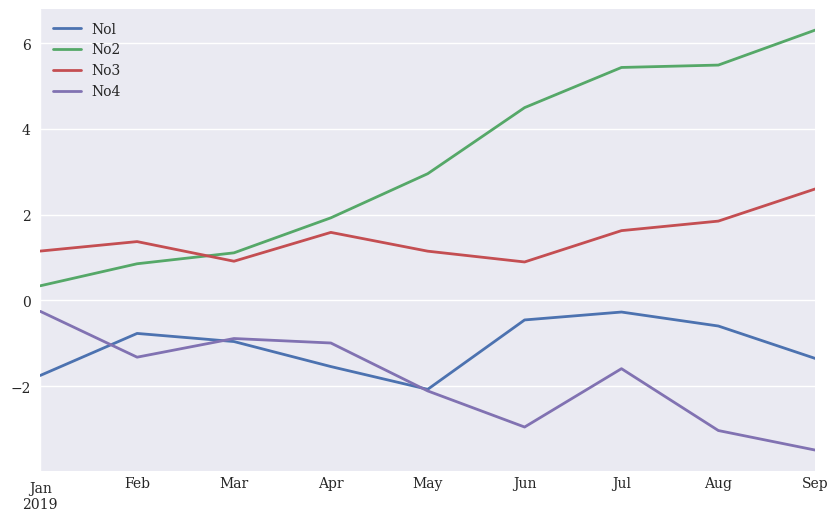

In [227]:
#4列の累積和を折れ線グラフにプロット(図5-1)
df.cumsum().plot(lw=2.0, figsize=(10, 6));

##### もう1つの例として同じデータを使った棒グラフを作成します。

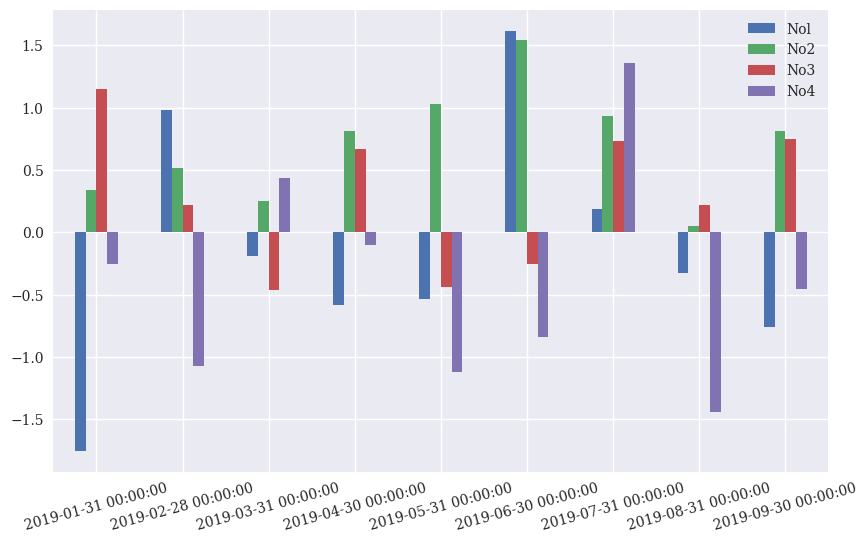

In [228]:
#.plot.bar(）で棒クラフ
#別の構文。kind引数でプロットの種類を変更
df.plot.bar(figsize=(10, 6), rot=15);
# df.plot(kind='bar', figsize=(lO, 6)

### 5.4 Seriesクラス

##### 本章ではこれまで主としてpandasのDataFrameクラスを扱いました。Seriesもpandasの重要なクラスです。1列のデータでしかないのが特徴です。その意味ではDataFrameクラスの特殊なもので、全部ではないが多くの性質と機能を共有します。Seriesオブジェク トは、複数列のDataFrameオブジェクトから1つの列を選択したときに得られます。


In [229]:
type(df)

pandas.core.frame.DataFrame

In [230]:
S = pd.Series(np.linspace(0, 15, 7), name='series')
S

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: series, dtype: float64

In [231]:
type(S) 

pandas.core.series.Series

In [232]:
s = df['Nol']
s

2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: M, Name: Nol, dtype: float64

In [233]:
type(s) 

pandas.core.series.Series

##### 主なDataFrameのメソッドは Seriesオブジェクトでも使うことができます。mean()とplot()というメソッドを試します（図 5-3を参照）。

In [234]:
s.mean()

-0.15021177307319458

<Axes: >

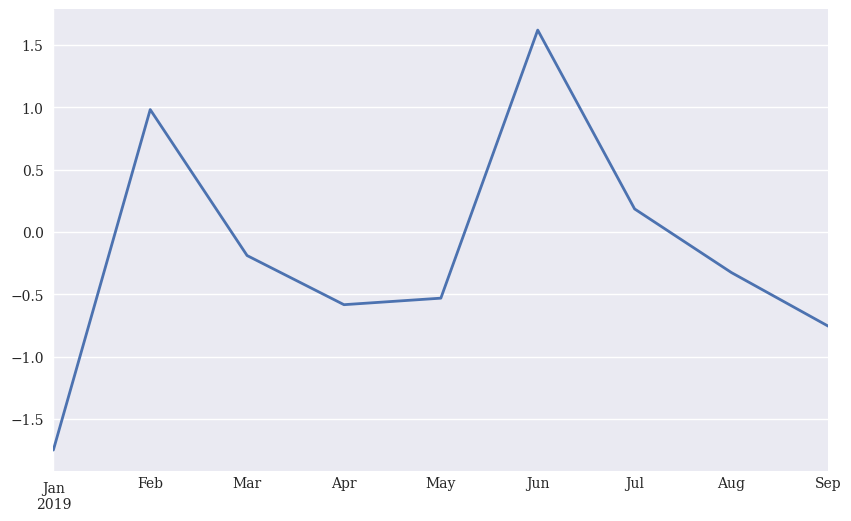

In [235]:
#図5.3
s.plot(lw=2.0, figsize=(10, 6))

### 5.5 GroupBy演算

##### pandasには強力で柔軟なグループ化機能があります。SQLやMicrosoftExcelのピボットテーブルと同様にグループ化しま す。グループ化のために、例えば、四半期を示す値の列を追加できます。

In [236]:
df['Quarter'] = ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']
df

,Nol,No2,No3,No4,Quarter
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [237]:
#Quarter列によるグループ化
groups = df.groupby('Quarter')

In [238]:
#各グループの行数
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [239]:
#列ごとの平均
groups. mean()

,Nol,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [240]:
#列ごとの最大値
groups.max() 

,Nol,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


In [241]:
#列ごとの最小／最大値
groups.aggregate([min, max]).round(2) 

Nol         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

In [242]:
#グループ化は複数列でもできます。そのために、偶数月か奇数月かを示す列を追加します。
df['Odd_Even'] = ['Odd','Even','Odd','Even','Odd','Even','Odd','Even','Odd']
groups= df.groupby(['Quarter','Odd_Even'])

In [243]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [244]:
groups[ ['Nol','No4']].aggregate([sum, np.mean]) 

Nol                 No4          
                       sum      mean       sum      mean
Quarter Odd_Even                                        
Q1      Even      0.981321  0.981321 -1.070043 -1.070043
        Odd      -1.939261 -0.969631  0.182727  0.091364
Q2      Even      1.035387  0.517693 -0.946847 -0.473423
        Odd      -0.531280 -0.531280 -1.118318 -1.118318
Q3      Even     -0.326238 -0.326238 -1.443217 -1.443217
        Odd      -0.571834 -0.285917  0.905609  0.452805

### 5.6 複合選択

##### 列値の条件を論理式で複数組み合わせことによってデータを選択することも多くあります。次にデータセットの例を挙げます。

In [245]:
#標準正規分布に従う乱数のndarrayオブジェクト
data= np.random.standard_normal((10, 2))

In [246]:
#同じ乱数のDataFrameオブジェクト
df = pd.DataFrame(data, columns=['x','y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 292.0 bytes


In [247]:
#head()メソッドで先頭5行
df.head()

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


In [248]:
#tail()メソッドで末尾5行
df.tail()

,x,y
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


##### 次のコードでは2つの列にPythonの比較演算子と論理演算子を使います。

In [249]:
#列Xの値が0.5より大きいか
df['x'] > 0.5

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [250]:
#列xの値が正かつ列yの値が負
(df['x'] > 0) & (df['y'] < 0)

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [251]:
#列xの値が正または列yの値が負
(df['x'] > 0) | (df['y'] < 0)

0     True
1     True
2     True
3     True
4     True
5    False
6    False
7     True
8     True
9     True
dtype: bool

##### 得られたブール値 Seriesオブジェクトを使えば複合データ（行）選択は簡単です。代わりにquery()メソッドで条件をstrオブジェクトで渡すこともできます。

In [252]:
#列xの値が正の全行
df[df['x'] > 0] 


,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [253]:
df.query('x>0') 

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [254]:
#列xの値が正かつ列yの値が負の全行
df[(df['x'] > 0) & (df['y'] < 0)]

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [255]:
df.query('x>0 & y<0')

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096


In [256]:
#列Xの値が正または列yの値が負の全行（列に属性でアクセス）
df[(df.x > 0) | (df.y < 0)]


,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


##### 比較派算子をDataFrameオブジェクト全体に一度に適用することもできます。

In [257]:
#DataFrameオブジェクトのどの値が正か
df > 0

,x,y
0,True,False
1,False,False
2,False,False
3,True,False
4,True,False
5,False,True
6,False,True
7,False,False
8,False,False
9,True,True


In [258]:
#正の値を選択し、それ以外のところはNaNにする
df[df > 0]

,x,y
0,1.189622,NaN
1,NaN,NaN
2,NaN,NaN
3,0.007315,NaN
4,1.299748,NaN
5,NaN,0.357508
6,NaN,1.470714
7,NaN,NaN
8,NaN,NaN
9,0.108863,0.507810


### 5.7 連結、結合、マージ


##### 本節では、DataFrameオブジェクトの簡単なデータセットを組み合わせる各種の方式を学びます。2つのデータセットは次の通りです。

In [259]:
dfl = pd.DataFrame(['100','200','300','400'], index= ['a','b','c','d'], columns=['A',])
dfl

,A
a,100
b,200
c,300
d,400


In [260]:
df2 = pd.DataFrame(['200','150','50'], index= ['f','b','d'], columns= ['B', ]) 
df2

,B
f,200
b,150
d,50


#### 連結

##### 連結すなわち追加は基本的にDataFrameオブジェクトに他のオブジェクトの行を追加することです。append()メソッドまたはpd.concat()関数で可能です。問題はインデックスの値の扱いです。

In [261]:
#df2のデータを新たな行としてdf1に追加(①)
dfl.append(df2, sort=False)

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_20096\1945171531.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfl.append(df2, sort=False)


,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [262]:
#①と同じだが、インデックス無視(②)
dfl.append(df2, ignore_index=True, sort=False)

C:\Users\iikkdn\AppData\Local\Temp\ipykernel_20096\1056126994.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfl.append(df2, ignore_index=True, sort=False)


,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [263]:
#①と同じ結果
pd.concat((dfl, df2), sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [264]:
#②と同じ結果
pd.concat((dfl, df2), ignore_index=True, sort=False)


,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


#### 結合

##### 2つのデータセットの結合でも、DataFrameオブジェクトの順序が問題ですが、結果は連結の場合と異なります。最初のDataFrameオブジェクトのインデックスの値だけを使います。このデフォルトの振る舞いは左結合と言います。

In [265]:
#dflのインデックスの値
dfl.join(df2)

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [266]:
#df2のインデックスの値
df2.join(dfl)

,B,A
f,200,NaN
b,150,200
d,50,400


##### 全部で4種類のjoinメソッドがあり、インデックスの値と対応するデータ行の扱いがそれぞれ違います。

In [267]:
#左結合がデフォルト
dfl.join(df2, how='left')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [268]:
#右結合は、DataFrameオブジェクトの結合順序を逆にしたものと同じ
dfl.join(df2, how='right')

,A,B
f,NaN,200
b,200,150
d,400,50


In [269]:
#内部結合は両方のインデックスにあるインデックスの値だけ保持する
dfl.join(df2, how='inner')

,A,B
b,200,150
d,400,50


In [270]:
#外部結合は両方のインデックスの値をすべて保持する
dfl.join(df2, how='outer')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


##### 結合は空のDataFrameオブジェクトでも可能です。左外部結合と同じように列が順次作られます。

In [271]:
df=pd.DataFrame()

In [272]:
#dflが第1列A
df['A'] = dfl['A']
df

,A
a,100
b,200
c,300
d,400


In [273]:
#df2が第2列B
df['B'] = df2['B']
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


##### データセットの結合に辞書を使うと列が一度に作られるので、外部結合のようになります。

In [274]:
#DataFrameオブジェクトの列をdictオブジェクトの値として使用
df = pd.DataFrame({'A': dfl['A'],'B': df2['B']})
df

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


#### マージ

##### 結合演算は結合されるDataFrameオブジェクトのインデックスについて行われますが、マージ演算は2つのデータセットに共通の列について行われます。次の例では、新たな列Cを元のDataFrameオブジェクト両方に追加します。

In [275]:
c = pd.Series([250, 150, 50], index=['b','d','c'])
dfl['C'] = c
df2['C'] = c

In [276]:
dfl

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [277]:
df2

,B,C
f,200,NaN
b,150,250.0
d,50,150.0


##### マージ演算はデフォルトで共有列Cについて行われます。外部マージのような他のオプションもあります。

In [278]:
#デフォルトのマージは列C
pd.merge(dfl, df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [279]:
pd.merge(dfl, df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [280]:
#全データ行を保持する外部マージも可能
pd.merge(dfl, df2, how='outer')


,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


##### さまざまなマージ演算があります。次のコードでその一部を示します。

In [281]:
pd.merge(dfl, df2, left_on='A', right_on='B') 

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [282]:
pd.merge(dfl, df2, left_on='A', right_on='B', how='outer')

,A,C_x,B,C_y
0,100,NaN,NaN,NaN
1,200,250.0,200,NaN
2,300,50.0,NaN,NaN
3,400,150.0,NaN,NaN
4,NaN,NaN,150,250.0
5,NaN,NaN,50,150.0


In [283]:
pd.merge(dfl, df2, left_index=True, right_index=True) 

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


In [284]:
pd.merge(dfl, df2, left_index=True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


In [285]:
pd.merge(dfl, df2, on='C', left_index=True) 

MergeError: Can only pass argument "on" OR "left_index" and "right_index", not a combination of both.

In [286]:
pd.merge(dfl, df2, on='C', right_index=True)

MergeError: Can only pass argument "on" OR "left_index" and "right_index", not a combination of both.

In [287]:
pd.merge(dfl, df2, on='C', left_index= True, right_index= True)

MergeError: Can only pass argument "on" OR "left_index" and "right_index", not a combination of both.

### 5.8 性能について


##### pandasでは同じ目的を達成するのに複数の選択肢があることを本章の例が示しています。本節では2つの列要素ごとの和について、それらを比較します。まず、NumPyで作ったデータセットです。

In [288]:
#乱数のndarrayオブジェクト
data= np.random.standard_normal((1000000, 2))
data.nbytes

16000000

In [289]:
#その乱数のDataFrameオブジェクト
df = pd.DataFrame(data, columns=['x','y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1000000 non-null  float64
 1   y       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


##### 次に、オプションごとの処理とその性能値を示します。

In [290]:
#列 (Seriesオブジェクト）を直接扱うのが最速
%time res = df['x'] + df['y']
CPU times: user 7.35 ms, sys: 7.43 ms, total: 14.8 ms
Wall time: 7.48 ms 
res[ :3] 


SyntaxError: invalid syntax (2716991465.py, line 3)

In [291]:
#DataFrameオブジェクトのsum()メソッド呼び出しで和を計算
%time res= df.sum(axis=1) 

CPU times: total: 31.2 ms
Wall time: 42.8 ms


In [292]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [293]:
#ndarrayオフジェクトのsum()メソッド呼び出しで和を計算
%time res= df.values.sum(axis=1)

CPU times: total: 15.6 ms
Wall time: 16.5 ms


In [294]:
res[:3]

array([ 0.3872424 , -0.96934273, -0.86315944])

In [295]:
#DataFrameオブジェクトに関数np.sum()で和を計算
%time res= np.sum(df, axis=1) 

CPU times: total: 15.6 ms
Wall time: 40.9 ms


In [296]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [297]:
#ndarrayオブジェクトに関数np.sum()で和を計算
%time res= np.sum(df.values, axis=1) 
CPU times: user 49.3 ms, sys: 2.36 ms, total: 51.7 ms 
Wall time: 26.9 ms


SyntaxError: invalid syntax (2016688667.py, line 3)

In [298]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

##### 最後に、メソッドeval()とapply()のそれぞれによる計算です。

In [299]:
#eval()は（複雑な）数値式を評価するメソッド。列を直接処理。
%time res= df.eval('x + y')

CPU times: total: 0 ns
Wall time: 14 ms


In [300]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [301]:
#apply()メソッドで行ごとに処理するのが一番遅い。Pythonで行をループするのと同じ。
%time res = df. apply(lambda row: row['x'] + row['y'], axis=l) 
CPU times: user 19.6 s, sys: 83.3 ms, total: 19.7 s 
Wall time: 19.9 s

SyntaxError: invalid syntax (1827850223.py, line 3)

In [302]:
res[ :3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

### 選択は賢明に

##### 同じことをするにもpandasには複数のオプションがある。どれを使うべきかはっきりしないが時間が重要な場合、最高性能が得られる方式を比較して選ぶことが大切である。この簡単な例においても実行時間は1桁違う。

### 5.9 結論

##### pandasは強力なデータ分析ツールでいわゆる「PyDataスタック」の中心パッケージです。そのDataFrameクラスはあらゆる表データを扱うことができます。そのようなオブジェクトのほとんどの演算がベクトル化され、 NumPyと同様、簡潔で高性能なコードになります。さらに、pandasは（例えばNumPyでは無理な）不完全なデータセットも扱うことができます。pandasとDataFrameは本書の後の章でも活躍し、必要に応じて説明していきます。